<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_week10_1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH 05 회귀

## 01. 회귀 소개

회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.

회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다.

$Y=W_1X_1 + W_2X_2+...+W_nX_n$

이라는 선형 회귀식을 예로 들면 $Y$는 종속변수, $X_1,X_2,...,X_n$은 독립변수를 의미한다. 그리고 $W_1,W_2,...,W_n$은 이 독립변수의 값에 영향을 미치는 회귀 계수이다. 머신러닝 관점에서 보면 독립변수는 피처에 해당하며 종속변수는 결정값이다. 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.

회귀는 회귀의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있다.

<회귀 유형 구분>
|**독립변수 개수**|**회귀 계수의 결합**|
|:-----|:------|
|1개: 단일 회귀|선형: 선형 회귀|
|여러 개: 다중 회귀|비선형: 비선형 회귀|

지도학습은 두 가지 유형으로 나뉘는데 바로 분류와 회귀이다. 이 두 가지 기법의 가장 큰 차이는 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고, 회귀는 연속형 숫자 값이라는 것이다.

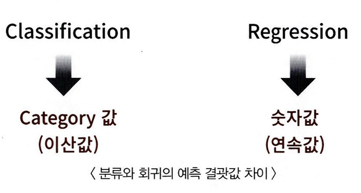


여러가지 회귀 중에서 선형 회귀가 가장 많이 사용된다. 선형 회귀는 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식이다. 선형 회귀 모델은 규제 방법에 따라 별도의 유형으로 나뉠 수 있으며 규제는 과적합을 해결하기 위해 회귀계수에 패널티 값을 적용하는 것을 말한다.

<대표적인 선형 회귀 모델>

* 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델이다.

* 릿지(Ridge): 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다.

* 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불린다.

* 엘라스틱넷(ElasticNet): L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.

* 로지스틱 회귀(Logistic Regression): 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다. 로지스틱 회귀는 매우 강력한 분류 알고리즘이다. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다.

## 02. 단순 선형 회귀를 통한 회귀 이해

단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀이다. 예를 들어, 주택 가격이 주택의 크기로만 결정된다고 하면, 일반적으로 주택의 크기가 크면 가격이 높아지는 경향이 있기 때문에 다음과 같이 주택 가격은 주택 크기에 대해 선형(직선 형태)의 관계로 표현할 수 있다.

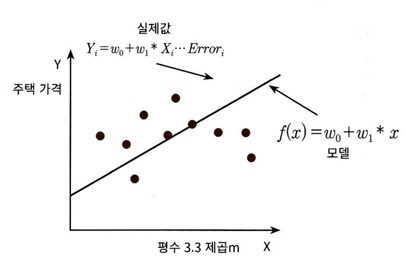

X축이 주택의 크기(평당 크기)이고 Y축이 주택의 가격 축인 2차원 평면에서 주택 가격은 특정 기울기와 절편을 가진 1차 함수식으로 모델링할 수 있다. 즉, 예측값 $
\hat{Y}는 w_0+w_1X$로 계산할 수 있다. 독립변수가 1개인 단순 선형 회귀에서는 이 기울기 $w_1$과 절편 $w_0$을 회귀 계수로 지칭한다(절편은 영어로 intercept이다). 그리고 회귀 모델을 이러한 $\hat{Y} = w0 + w1X$와 같은 1차 함수로 모델링했다면 실제 주택 가격은 이러한 1차 함수 값에서 실제 값만큼의 오류 값을 뺀(또는 더한) 값이 된다($w_0+w_1X$+오류 값).

이렇게 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부른다. 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미이다. 동시에 오류 값이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.

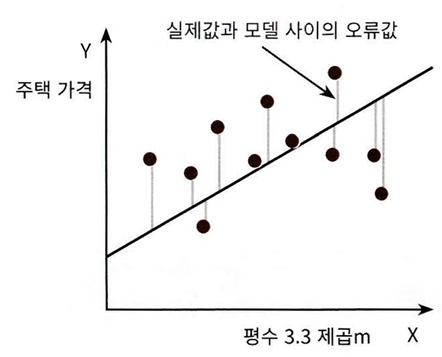

오류 값은 +나 -가 될 수 있다. 그래서 전체 데이터의 오류 합을 구하기 위해 단순히 더했다가는 뜻하기 않게 오류 합이 크게 줄어들 수 있다. 따라서 보통 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)을 취한다. 일반적으로 미분 등의 계산을 편리하게 하기 위해서  RSS 방식으로 오류 합을 구한다. 즉, $Error^{2}$ = RSS이다.

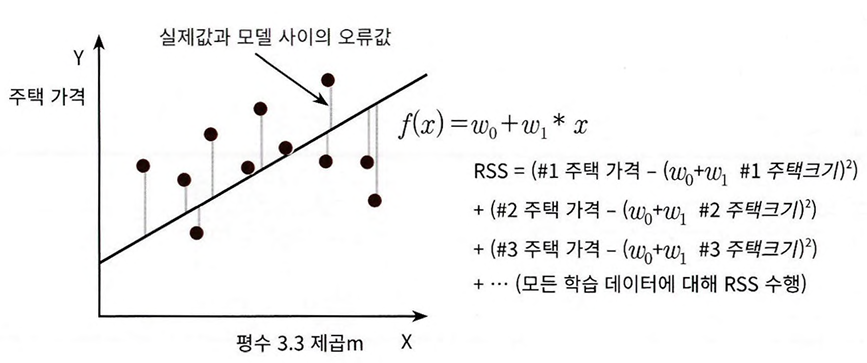

RSS는 이제 변수가 $w_0, w_1$인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 $w_0, w_1$, 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다. RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다(학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주한다). 일반적으로 RSS는 학습 데이터의 건수로 나누어서 다음과 같이 정규화된 식으로 표현된다.

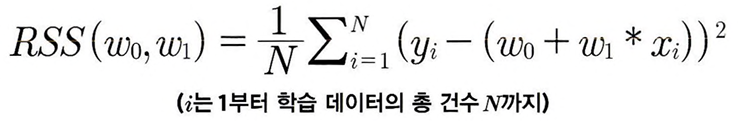

회귀에서 이 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 한다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다. 비용 함수를 손실 함수(loss function)라고도 한다.

## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

경사하강법은 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식이다. 사실 경사 하강법은 '데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝의 개념을 가능하게 만들어준 핵심 기법의 하나이다. 경사 하강법의 사전적 의미인 '점진적인 하강'이라는 뜻에서도 알 수 있듯이, '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식이다.

경사 하강법의 핵심은 "어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?"이다. 예를 들어 비용 함수가 다음 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트한다. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환한다.


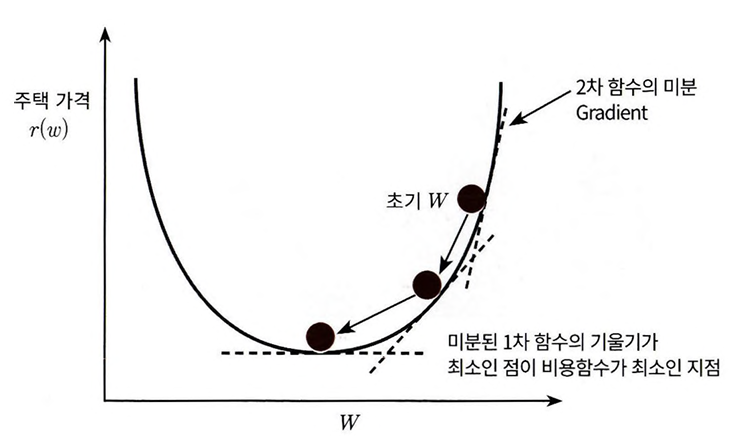

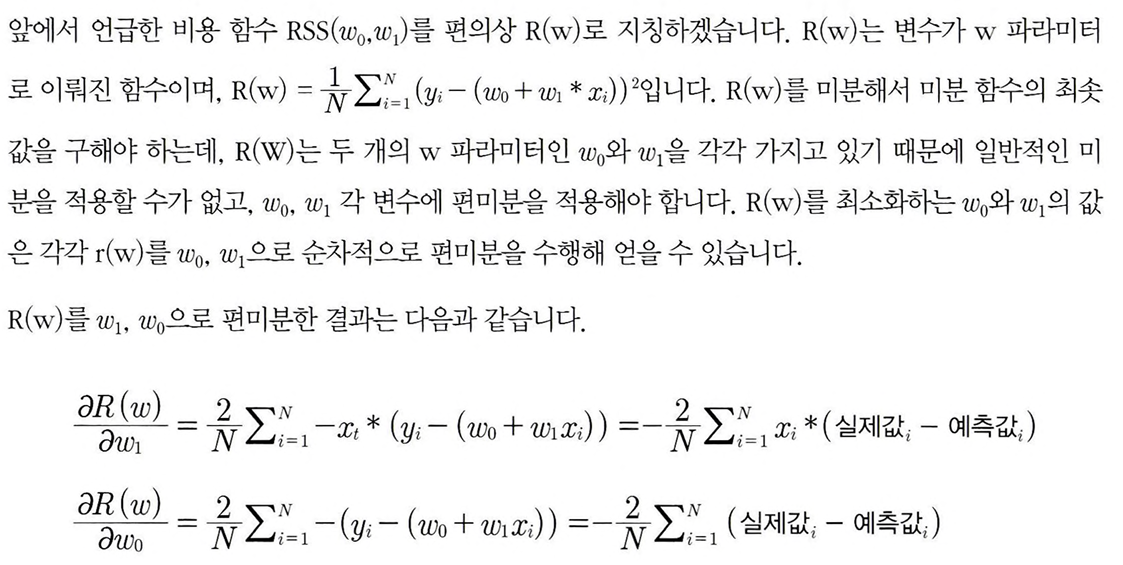


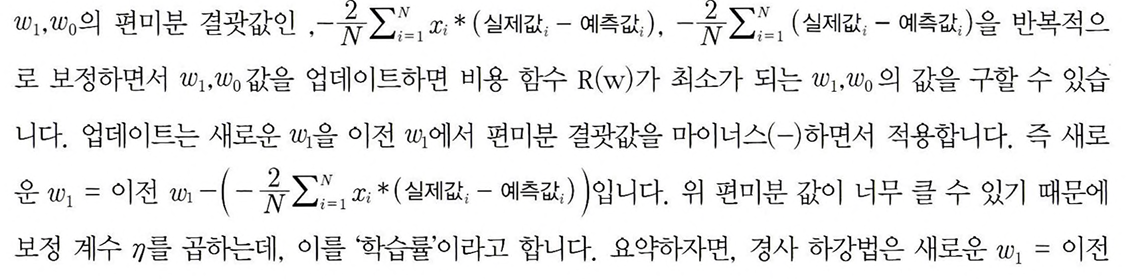

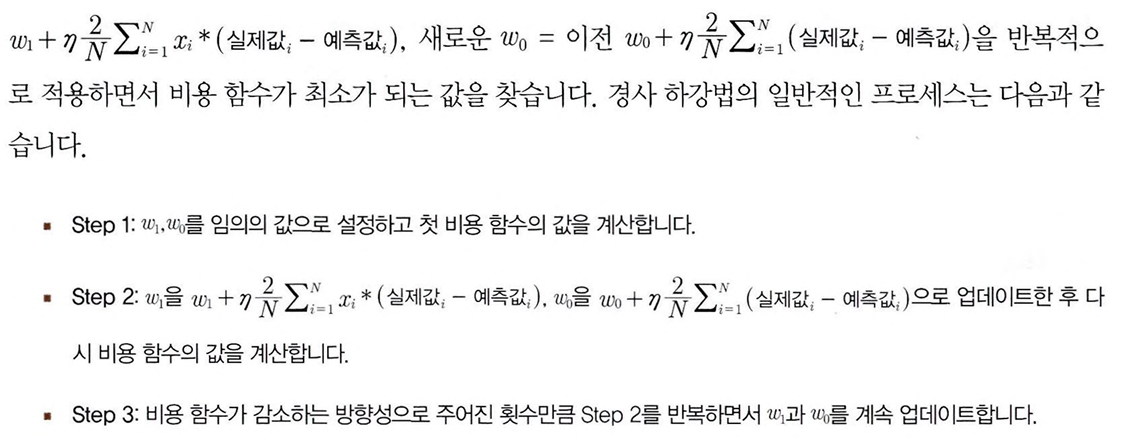

지금까지 정리한 수식과 절차를 이용해 경사 하강법을 파이썬 코드로 구현해 보자. 간단한 회귀 식인 y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀 계수 $w_1, w_0$을 도출하는 것이다.

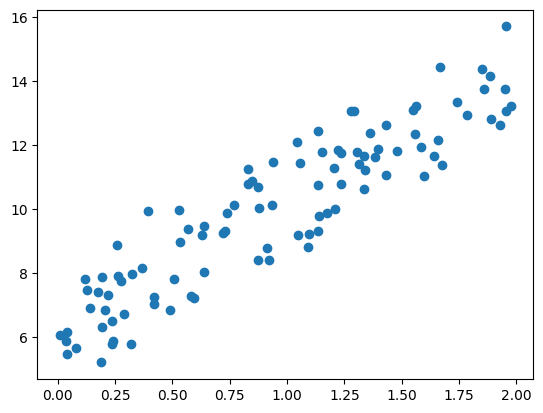

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100, 1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

이 데이터는 y = 4X + 6을 중심으로 무작위로 퍼져 있다. 다음으로 비용 함수를 정의해 보자. 비용 함수 get_cost()는 실제 y 값과 예측된 y 값을 인자로 받아서 image.png을 계산해 봔한한다.



```
def get_cost(y, y_pred):
N = len(y)
 cost = np.sum(np.square(y - y_pred))/N
 return cost
```



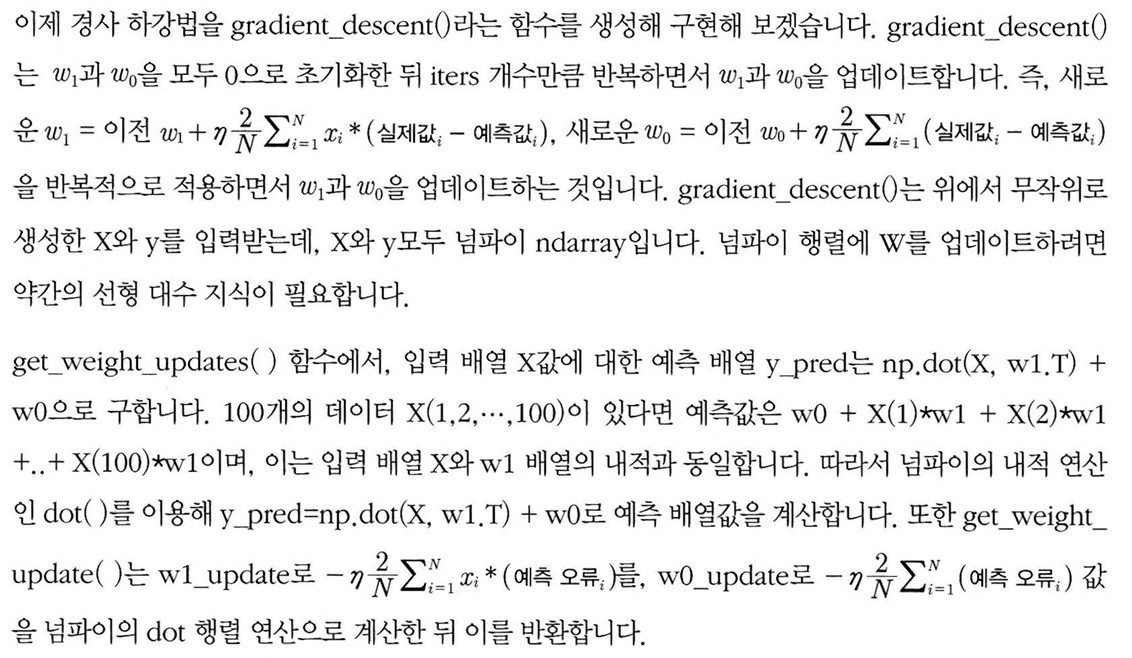

In [7]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y- y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))
  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

다음은 get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수인 gradient_descent_steps() 함수를 생성하자.


In [8]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

이제 gradient_descent_steps()를 호출해 w1과 w0을 구해 보자. 그리고 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산해 보자.

In [9]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters =1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0은 6.162가 도출되었다. 예측 오류 비용은 약 0.9935이다.

앞에서 구한 y_pred에 기반해 회귀선을 그려 보자.

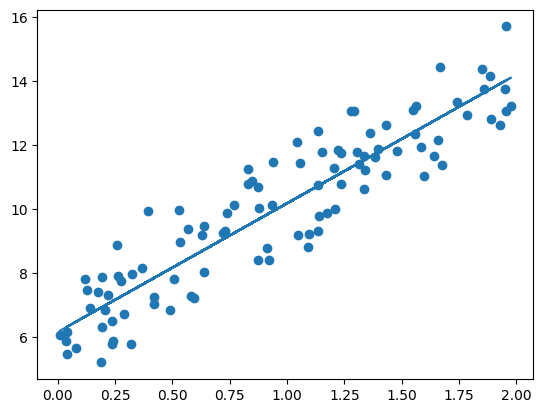

In [10]:
plt.scatter(X,y)
plt.plot(X,y_pred)

경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있다. 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다. 그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)을 이용한다. 확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다. 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다. (미니 배치) 확률적 경사 하강법을 stochastic_gradient_descent_steps() 함수로 구현해 보겠다. stochastic_gradient_descent_steps() 함수는 앞에서 생성한 gradient_descent_steps()와 크게 다르지 않다. 다만 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.

In [19]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

이제 만들어진 stochastic_gradient_descent_steps()를 이용해 w1, w0 및 예측 오류 비용을 계산해 보자.

In [20]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred = w1[0,0]*X +w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9937로 경사 하강법으로 구한 예측 오류 비용 0.9935보다 아주 조금 높을 뿐으로 큰 예측 성능상의 차이가 없음을 알 수 있다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용한다.

피처가 한 개인 경우의 예측값 $\hat{Y} = w_0 + w_1X$로 회귀 계수를 도출한다. 피처가 M개($X_1, X_2, ..., X_{100}$) 있다면 그에 따른 회귀 계수도 M+1(1개는 $w_0$)개로 도출된다.

즉 $\hat{Y} = w_0 + w_1X_1 + w_2X_2 + ... + W_{100}X_{100}$과 같이 예측 회귀식을 만들 수 있다. 이렇게 회귀 계수가 많아지더라도 선형대수를 이용해 간단하게 예측값을 도출할 수 있다. 앞의 예제에서 입력 행렬 X에 대해서 예측 행렬 y_pred는 굳이 개별적으로 X의 개별 원소와 w1의 값을 곱하지 않고 np.dot(X, w1.T) + w0을 이용해 계산했다. 마찬가지로 데이터의 개수가 N이고 피처 M개의 입력 행렬을 $X_{mat}$, 회귀 계수 $w_1, w_2, ..., w_{100}$을 W 배열로 표기하면 예측 행렬 $\hat{Y}$ = np.dot($X_{mat}, W^{T}$) + $w_0$로 구할 수 있다.

image.png

$w_0$를 Weight의 배열인 W안에 포함시키기 위해서 Xmat의 맨 처음 열에 모든 데이터의 값이 1인 피처 Feat 0을 추가하겠다. 이제 회귀 예측값은 $\hat{Y} = X_{mat}W^{T}$와 같이 도출할 수 있다.

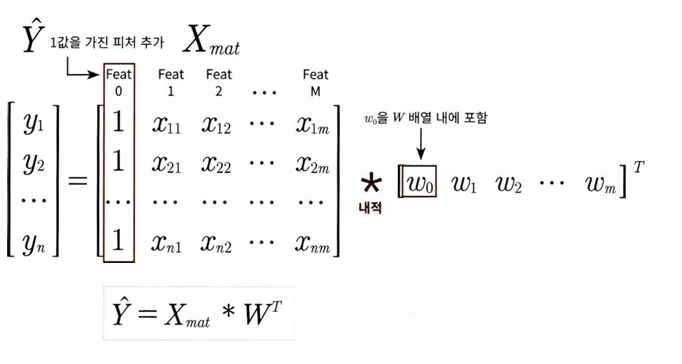



## 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공한다. 이들 선형 모델 중 규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스인 LinearRegression을 이용해 보스턴 주택 가격 에측 회귀를 구현할 것이다. 그전에 먼저 LinearRegression 클래스에 대해 살펴보겠다.

**LinearRegression 클래스 - Ordinary Least Squares**

LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다. LinearRegression 클래스는 fit() 메서드로 X, y 배열을 입력받으면 회귀 계수(Cosfficients)인 W를 coef_ 속성에 저장한다.

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=True, n_jobs=1)

Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이러한 현상을 다중공선성(multi-collinearity) 문제라고 한다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있다. 다음으로 예측된 회귀 모델을 평가하는 방법에 대해 알아보겠다.

**회귀 평가 지표**

회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다. 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄된다(데이터 두 개의 예측 차이가 하나는 -3, 다른 하나는 +3일 경우 단순히 더하면 오류가 0으로 나타나기 때문에 정확한 지표가 될 수 없다). 이 때문에 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구한다.

일반적으로 회귀의 성능을 평가하는 지표는 다음과 같다.

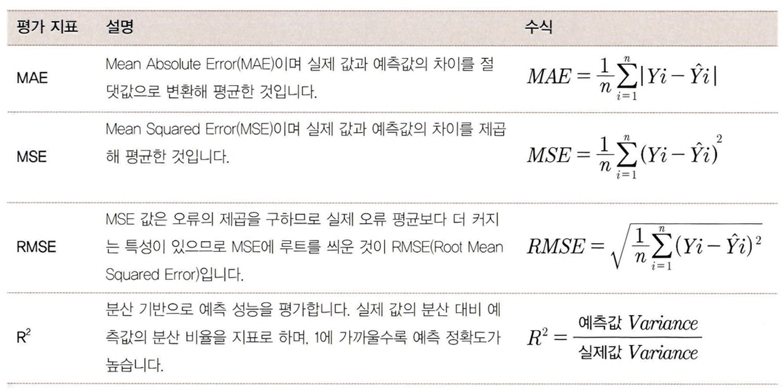

이 밖에 MSE나 RMSE에 로그를 적용한 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error)도 사용한다.

사이킷런은 아쉽게도 RMSE를 제공하지 않는다. RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 한다. 다음은 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값이다.

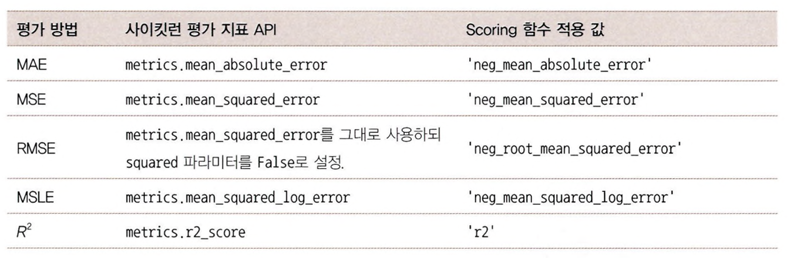

cross_val_score, GridSearchCV와 같은 Scoring 함수에 회귀 평가 지표를 적용할 때 한 가지 유의할 점이 있다. 예를 들어, MAE의 scoring 파라미터 값을 살펴보면 'neg_mean_absolute_error'와 같이 ‘neg_’라는 접두어가 붙어 있습니다. 이는 Negative(음수) 값을 가진다는 의미인데, MAE는 절댓값의 합이기 때문에 음수가 될 수 없다. Scoring 함수에 'neg_mean_absolute_error'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동평가하기 때문이다(특히 GridSearchCV의 경우 가장 좋은 Evaluation 값을 가지는 하이퍼 파라미터로 Estimator를 학습까지 자동으로 시킬 수 있다). 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정이 필요하다.

따라서 -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 한다. 예를 들어 10 > 1이지만 음수를 곱하면 -1 > -10이 된다. metrics.mean_absolute_error( )와 같은 사이킷런 평가 지표 API는 정상적으로 양수의 값을 반환한다. 하지만 Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 * metrics.mean_absolute_error()이니 주의가 필요하다.



**LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

이제 LinearRegression 클래스를 이용해 선형 회귀 모델을 만들어 보겠다. 사이킷런에 내장된 데이터 세트인 보스턴 주택 가격 데이터를 이용한다.

사이킷런은 보스턴 주택 가격 데이터 세트를 load_boston()을 통해 제공한다. 해당 데이터 세트를 로드하고 DataFrame으로 변경하겠다.



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns=feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICe 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = target
print('Boston 데이타셋 크기 :', bostonDF.shape)
display(bostonDF.head())

Boston 데이타셋 크기 : (506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

데이터 세트 피처의 Null 값은 없으며 모두 float 형입니다. bostonDF.info( )로 쉽게 확인할 수 있다.

다음으로 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 알아보겠다. 'RM', 'zn', 'Indus', 'nox', 'age', 'ptratio', 'lstat', 'rad'의 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인한다. 시본(Seaborn)의 regplot() 함수는 X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그려준다. matplotlib.subplots()를 이용해 각 ax마다 칼럼과 PRICE의 관계를 표현한다.

matplotlib의 subplots()은 여러 개의 그래프를 한 번에 표현하기 위해 자주 사용된다. 인자로 입력되는 ncols는 열 방향으로 위치할 그래프의 개수이며, mows는 행 방향으로 위치할 그래프의 개수이다. ncols=4, nrows=2이면 2개의 행과 4개의 열을 가진 총 8개의 그래프를 행, 열 방향으로 그릴 수 있다.

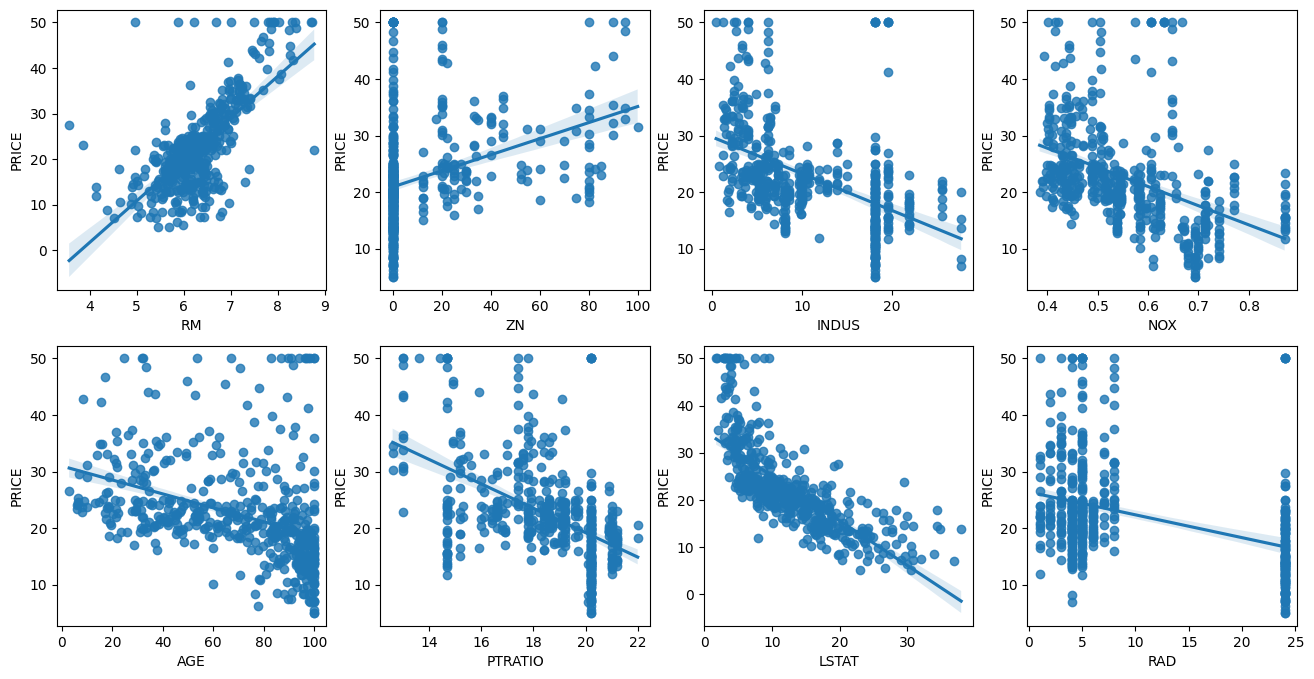

In [22]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다. RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 크다. 즉, 방의 크기가 클수록 가격이 증가하는 모습을 확연히 보여준다. LSTAT(하위 계층의 비율)는 음 방향의 선형성 (Negative Linearity) 이 가장 크다. LSTAT이 적을수록 PRICE가 증가하는 모습이 확연히 나타난다.

이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들겠다. train_test_split()을 이용해 학습과 테스트 데이터 세트를 분리해 학습과 예측을 수행한다. 그리고 metrics 모듈의 mean_squared_error()와 r2_score() API를 이용해 MSE와 R2 Score를 측정하겠다.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE ： {1:.3F}'.format(mse, rmse))
print('Variance score ： {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE ： 4.159
Variance score ： 0.757


LInearRegression으로 생성한 주택가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값을 보겠다. 절편은 LinearRegression 객체의 intercept_ 속성에, 회귀 계수는 coef_ 속성에 값이 저장돼 있다.

In [24]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력해 보겠다. 이를 위해 판다스 Series의 sort_values() 함수를 이용한다.

In [25]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커 보인다. 차츰 최적화를 수행하면서 피처 coefficients의 변화도 같이 살펴보겠다.

이번에는 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해 보겠다. 사이킷런은 cross_val_score()를 이용할 텐데, RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야 한다. cross_val_score() 의 인자로 scoring:1 neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수 값이다. 앞에서도 설명했듯이 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인 데 반해, 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이다. 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해서 scoring:1 neg_mean_squared_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환한다. 따라서 cross_val_score( )에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 된다. 이렇게 다시 변환된 MSE값에 넘파이의 sqrt() 함수를 적용해 RMSE를 구할 수 있다.

In [26]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scors: ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scors:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


5개 폴드 세트에 대해서 교차 검증을 수행한 결과, 평균 RMSE는 약 5.829가 나왔다. cross_val_score(scoring="neg_mean_squared_error")로 반환된 값을 확인해 보면 모두 음수임을 알 수 있다.

## 05. 다항 회귀와 과(대)적합/과소적합 이해
**다항 회귀 이해**

지금까지 설명한 회귀는 y = w0 + w1x1 + w2x2 + ,...,+ wnxn과 같이 독립변수(feature)와 종속변수(target)의 관계가 일차 방정식 형태로 표현된 회귀였다. 하지만 세상의 모든 관계를 직선으로만 표현할 수는 없다. 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial) 회귀라고 한다. 즉, 다항 회귀는 y = w0 + w1x1 + w2x2 + w3x1w2 + w4x1^2+w5x2^2과 같이 표현할 수 있다.

한 가지 주의할 것은 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀라는 점이다. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다. 위의 식 y = w0 + w1x1 + w2x2 + w3x1w2 + w4x1^2+w5x2^2는 새로운 변수인 Z를 z = [x1,x2,x1x2,x1^2,x2^2]로 한다면 y = w0+ w1z1 + w2z2 + w3z3 + w4z4 + w5z5와 같이 표현할 수 있기에 여전히 선형 회귀이다. 다음 그림을 보면 데이터 세트에 대해서 피처 X에 대해 Target Y 값의 관계를 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높다.

아쉽지만 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. 이를 위해 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환한다. PolynomialFeatures 클래스는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다. 다른 전처리 변환클래스와 마찬가지로 PolynomialFeatures 클래스는 fit(), transform() 메서드를 통해 이 같은 변환 작업을 수행한다. 다음 예제는 PolynomialFeatures를 이용해 단항값 [x1,x2]를 2차 다항값으로 [1, x1, x2, x1^2, x1x2, x2^2]로 변환하는 예제이다.

In [29]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X )

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항 계수 피처 [x1, x2]를 2차 다항 계수 [1, x1, x2, x1^2, x1x2, x2^2]로 변경하므로 첫 번째 입력 단항 계수 피처 [x1 = 0, x2 = 1]은 [1, x1 = 0, x2 = 1, x1^2 = 0, x1x2 = 0, x2^2 = ] 형태인 [1,0,1,0,0,1]로 변환된다. 마찬가지로 두 번째 입력 단항 계수 피처 [x1 = 2, x2 = 3]은 [1, 2, 3, 4, 6, 9]로 변환된다. 이렇게 변환된 Polynomial 피처에 선형 회귀를 적용해 다항 회귀를 구현한다. Polynomial Features 클래스가 어떻게 단항식 값을 다항식 값으로 변경하는지 설명했으니, 이번에는 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도해 보겠다.

이를 위해 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측할 것이다. 먼저 3차 다항회귀의 결정 함수식은 다음과 같이 y = 1 + 2x1 + 3x1^2 + 4x2^3로 설정하고 이를 위한 함수 polynomial_func()를 만든다. 해당 함수는 3차 다항 계수 피처 값이 입력되면 결정 값을 반환한다.

In [27]:
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


이제 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현된다. PolynomialFeatures(degree=3)은 단항 계수 피처 [x1,x2]를 3차 다항 계수 [1,x1,x2,x1^2,x1x2,x2^2,x1^3,x1^2x2,x1x2^2,x1^3]과 같이 10개의 다항 계수로 변환한다.

In [30]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature： \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np. round (model.coef_, 2))
print('Polynomial 회귀 Shape ：', model.coef_.shape)

3차 다항식 계수 feature： 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape ： (10,)


일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어난다. 이 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어난다. 10개의 회귀 계수 [0. 0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]가 도출됐으며 원래 다항식 1 + 2x1 十 3x1^2 + 4x2^3의 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있음을 알 수 있다. 이처럼 사이킷런은 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현한다.

바로 이전 예제와 같이 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다는 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 코드를 더 명료하게 작성하는 방법이다.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y


# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model. named_steps['linear'] .coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다. 하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. 즉, 차수가 높아질수록 과적합의 문제가 크게 발생한다.

소스 코드에 대해 간략히 설명하자면, 원래 데이터 세트는 피처 X와 target y가 잡음(Noise)이 포함된 다항식의 코사인(Cosine) 그래프 관계를 가지도록 만들어준다. 그리고 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제이다.

학습 데이터는 30개의 임의의 데이터인 X, 그리고 X의 코사인 값에서 약간의 잡음 변동 값을 더한 target 인 y 로 구성된다.

In [32]:
import numpy as np
import matplotlib.pyplot as pit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

 # X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

이제 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교하겠다. 다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가한다. 그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측곡선을 그려보겠다.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


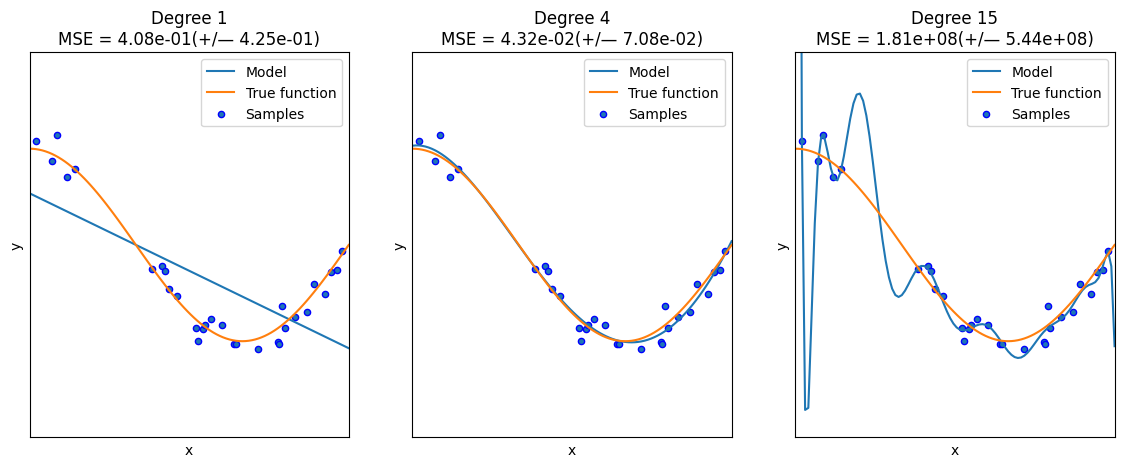

In [33]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
   ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps[’객체명,]을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1 *np.mean(scores)))

  # 0 부터 1 까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  # 실제 값 곡선
  plt.plot(X_test, true_fun(X_test),'-',label="True function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1 )); pit.ylim((-2, 2)); pit.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/— {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선이다. 점선으로 표현된 곡선은 실제 데이터 세트X, Y의 코사인 곡선이다. 학습 데이터는 0부터 1까지의 30개의 임의의 X 값과 그에 따른 코사인 Y값에 잡음을 변동 값으로 추가해 구성했으며 MSE(Mean Squared Error) 평가는 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것이다.

* 맨 왼쪽의 Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같다. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보인다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 되었다. MSE 값은 약 0.41 이다.
* 가운데 Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습이다. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었다. MSE 값은 약 0.04로 가장 뛰어난 예측 성능을 나타내고 있다.
* 맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 182581084.83이 될 정도로 어처구니없는 오류 값이 발생했다(물론 과적합을 강조하기 위해 Degree를 매우 높은 차수인 15로 설정한 결과이다). 예측 곡선을 보면 데이터 세트의 변동 잡음값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이없는 수준의 높은 MSE 값이 나왔다.

Degree 15의 회귀 계수를 살펴보면 회귀 계수의 값이 [―2.98300000e+03 1.03900000e+05...]로 Degree 1, 4와 비교할 수 없을 정도로 매우 큰 값임을 알 수 있다. Degree 15라는 복잡한 다항식을 만족하기 위해 계산된 회귀 계수는 결국 현실과 너무 동떨어진 예측 결과를 보여준다.

결국 좋은 예측 모델은 Degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아니고 Degree 15와 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌, 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델을 의미한다.

**편향-분산 트레이드오프(Bias-Variance Trade off)**

편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나이다. 앞의 Degree1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있다. 이런 모델을 고편향(High Bias)성을 가졌다고 표현한다. 반대로 Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었다. 이런 모델을 고분산(High Variance) 성을 가졌다고 표현한다.

다음 그림의 '양궁 과녁' 그래프는 편향과 분산의 고/저의 의미를 직관적으로 잘 표현하고 있다. 다음 그림 상단 왼쪽의 저편향/저분산(Low Bias/Low Variance)은 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중돼 있는 아주 뛰어난 성능을 보여준다(아주 드물게 좋은 경우이다). 상단 오른쪽의 저편향/고분산(Low Bias/High Variance)은 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포돼있다. 하단 왼쪽의 고편향/저분산(High Bias/Low Variance)은 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중돼 있다. 마지막으로 하단 오른쪽의 고편향/고분산(High Bias/High Variance)은 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포돼 있다.

일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있다. 즉, 편향이 높으면 분산은 낮아지고（과소적합） 반대로 분산이 높으면 편향이 낮아진다（과적합）. 다음 그림은 편향과 분산의 관계에 따른 전체 오류 값(Total Error)의 변화를 잘 보여준다. 편향이 너무 높으면 전체 오류가 높다. 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 된다. 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하된다.

높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉽다. 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.